# __Stop and Frisk__
___

<img src="https://compote.slate.com/images/024e37d8-f12c-4ed7-9ce0-5c2b19d76182.jpg" style="float:left"/>

## Identificación del Problema
____

Stop and Frisk fue un programa que se implementó en Estados Unidos, particularmente en la ciudad de Nueva York, que llevo a cabo el departamento de policía con. Éste consiste en detener, cuestionar, y si es necesario, registrar a los civiles que parezcan sospechosos de portar armas o sustancias relacionadas con el contrabando. 

La Cuarta Enmienda requiere que antes de detener al sospechoso, el policía debe tener una sospecha razonable de que el sospechoso ha cometido o está a punto de cometer un delito. Si el policía sospecha razonablemente que el sospechoso está armado y es peligroso, el policía puede cachear al sospechoso, lo que significa que el policía dará una rápida palmada de la ropa exterior del sospechoso. El registro también se llama Terry Stop, derivado del caso de la Corte Suprema Terry vs. Ohio, 392 U.S. 1 (1968). 

Posteriormente fue objeto controversia racial. Según el reporte correspondiente al 2011 realizado por la New York Civil Liberties Union correspondiente al programa: los jóvenes afroamericanos y latinos fueron blanco de una cantidad enormemente desproporcionada de paradas

## Planteamiento Preguntas Clave
____

* ¿La ciudad es una variable decisiva para la realización del arresto?
* ¿Qué raza sufrió un mayor número de arrestos?
* ¿Cuáles fueron los rangos de edades donde más personas fueron arrestadas?
* ¿Qué variable tuvo mayor influencia en el arresto de la persona?
* De acuerdo a las variables de descripción física ¿Se puede definir un tipo de persona que es más propensa a ser arrestada?

## Colección de Datos
____

La metodología para la obtención de datos consistía en llenar un formato UF-250 posterior a la detención. Este formato, incluía el llenado de determinadas variables tales como características de la persona detenida, así como detalles de la detención. Posteriormente estas variables se capturan en una base de datos. Gran parte de las variables que forma parte de dicho formato son registradas como de tipo dicotómico en la base, de lo que se puede intuir que el interés residía en observar si el detenido cumplía o no con la característica descrita. Un ejemplo de esto es si el detenido portaba o no un arma, si el detenido puso resistencia o no. Además de esto, se registraban las características físicas de los detenidos, como son edad, sexo, color de ojos, entre otras.

La base de datos se obtuvo de https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page, la cual es la pagina del New York Police Department (NYPD) donde se almacenan las bases de datos correspondientes a diferentes años.

### Diccionario de Datos
____

| Variable | Descripción |
|:---:|:---:|
|stop_frisk_date|Fecha de detención|
|stop_frisk_time|Hora de detención|
|day2|Dia|
|stop_was_initiated|Cómo empezó la detención|
|suspected_crime_description|Descripción del crimen|
|suspect_arrested_flag|La persona fue arrestada|
|suspect_arrest_offense|Motivo de arresto|
|frisked_flag|La persona fue cateada|
|searched_flag|Ls persona fue revisada|
|ask_for_consent_flg|Se solicitó consentimiento|
|consent_given_flg|Consentimiento otorgado|
|other_contraband_flag|La persona detenida incurrió en contrabando|
|weapon_found_flag|Se le encontró algún arma|
|suspect_reported_age|Edad de la persona sospechosa en años|
|suspect_sex|Sexo de la persona sospechosa|
|suspect_race_description|Raza de la persona sospechosa|
|suspect_height|Altura de la persona sospechosa|
|suspect_weight|Peso de la persona sospechosa|
|suspect_body_build_type|Complexion de la persona sospechosa|
|suspect_eye_color|Color de ojos de la persona sospechosa|
|suspect_hair_color |Color de pelo de la persona sospechosa|
|stop_location_boro_name|Ciudad en la que se realizó la detención|

## Análisis Exploratorio de Datos y Limpieza de Base
---

In [ ]:
# linear algebra
import numpy as np
# data processing
import pandas as pd
# data visualization
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BEDU proyecto JN/sandf2019.csv',usecols=[1,2,5,6,16,21,22,29,30,31,32,33,37,64,65,66,67,68,69,70,71,82],
                 na_values = ['(null)',' ', '('])
df.columns = [x.lower() for x in df.columns] 
df.head()

,stop_frisk_date,stop_frisk_time,day2,stop_was_initiated,suspected_crime_description,suspect_arrested_flag,suspect_arrest_offense,frisked_flag,searched_flag,ask_for_consent_flg,consent_given_flg,other_contraband_flag,weapon_found_flag,suspect_reported_age,suspect_sex,suspect_race_description,suspect_height,suspect_weight,suspect_body_build_type,suspect_eye_color,suspect_hair_color,stop_location_boro_name
0,02/01/2019,14:30:00,Wednesday,Based on C/W on Scene,PETIT LARCENY,N,NaN,Y,N,Y,Y,N,N,30.0,MALE,BLACK,5.11,230.0,HEA,BRO,BLK,MANHATTAN
1,08/01/2019,02:30:00,Tuesday,Based on Self Initiated,GRAND LARCENY,Y,GRAND LARCENY,N,Y,N,N,N,N,22.0,MALE,BLACK,5.10,190.0,MED,BRO,BLK,MANHATTAN
2,12/01/2019,16:54:00,Saturday,Based on Radio Run,PETIT LARCENY,Y,PETIT LARCENY,N,N,N,NaN,N,N,56.0,MALE,WHITE,5.90,250.0,HEA,BLU,BLK,MANHATTAN
3,14/01/2019,21:21:00,Monday,Based on Radio Run,ROBBERY,N,NaN,N,N,N,N,N,N,NaN,MALE,BLACK,NaN,NaN,NaN,NaN,NaN,MANHATTAN
4,15/01/2019,18:50:00,Tuesday,Based on Radio Run,ASSAULT,Y,ASSAULT,Y,N,N,N,N,N,21.0,MALE,BLACK,5.90,150.0,THN,BLK,BLK,MANHATTAN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13459 entries, 0 to 13458
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stop_frisk_date              13459 non-null  object 
 1   stop_frisk_time              13459 non-null  object 
 2   day2                         13459 non-null  object 
 3   stop_was_initiated           13459 non-null  object 
 4   suspected_crime_description  13459 non-null  object 
 5   suspect_arrested_flag        13459 non-null  object 
 6   suspect_arrest_offense       4308 non-null   object 
 7   frisked_flag                 13459 non-null  object 
 8   searched_flag                13459 non-null  object 
 9   ask_for_consent_flg          13042 non-null  object 
 10  consent_given_flg            11717 non-null  object 
 11  other_contraband_flag        13459 non-null  object 
 12  weapon_found_flag            13459 non-null  object 
 13  suspect_reported

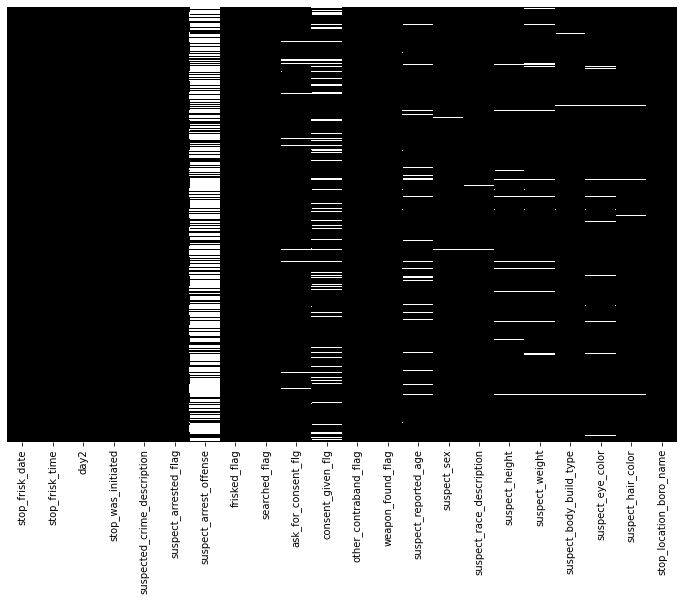

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(), yticklabels=False, 
           cbar=False, cmap='Greys_r')

In [ ]:
df.stop_frisk_date = pd.to_datetime(df.stop_frisk_date, dayfirst=True)
diccionario = {"N":0,"Y":1}
df.replace(diccionario, inplace=True)

In [ ]:
for x in df.columns[2:]:
    print(x,df[x].unique())

day2 ['Wednesday' 'Tuesday' 'Saturday' 'Monday' 'Thursday' 'Friday' 'Sunday']
stop_was_initiated ['Based on C/W on Scene' 'Based on Self Initiated' 'Based on Radio Run']
suspected_crime_description ['PETIT LARCENY' 'GRAND LARCENY' 'ROBBERY' 'ASSAULT' 'BURGLARY' 'MENACING'
 'CPW' 'CRIMINAL TRESPASS' 'GRAND LARCENY AUTO' 'OTHER'
 'CRIMINAL MISCHIEF' 'TERRORISM'
 'CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE'
 'CRIMINAL SALE OF MARIHUANA' 'CRIMINAL SALE OF CONTROLLED SUBSTANCE'
 'CPSP' 'AUTO STRIPPIG' 'FORCIBLE TOUCHING'
 'CRIMINAL POSSESSION OF MARIHUANA' 'MURDER'
 'UNAUTHORIZED USE OF A VEHICLE' 'MAKING GRAFFITI' 'RECKLESS ENDANGERMENT'
 'RAPE' 'PROSTITUTION' 'THEFT OF SERVICES'
 'CRIMINAL POSSESSION OF FORGED INSTRUMENT']
suspect_arrested_flag [0 1]
suspect_arrest_offense [nan 'GRAND LARCENY' 'PETIT LARCENY' 'ASSAULT' 'MENACING' 'CPW' 'ROBBERY'
 'GRAND LARCENY AUTO' 'OTHER' 'CRIMINAL POSSESSION OF CONTROLLE'
 'CRIMINAL TRESPASS' 'MURDER' 'CRIMINAL MISCHIEF'
 'CRIMINAL SALE OF CONTROLLED

In [ ]:
df['day'] = df.stop_frisk_date.dt.dayofweek

In [ ]:
stop = {'Based on C/W on Scene':0, 'Based on Self Initiated':1,
       'Based on Radio Run':2}
df.stop_was_initiated = df.stop_was_initiated.map(stop)

In [ ]:
col_vals = (df['suspected_crime_description'].append(df['suspect_arrest_offense'])).unique()
col_vals

array(['PETIT LARCENY', 'GRAND LARCENY', 'ROBBERY', 'ASSAULT', 'BURGLARY',
       'MENACING', 'CPW', 'CRIMINAL TRESPASS', 'GRAND LARCENY AUTO',
       'OTHER', 'CRIMINAL MISCHIEF', 'TERRORISM',
       'CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE',
       'CRIMINAL SALE OF MARIHUANA',
       'CRIMINAL SALE OF CONTROLLED SUBSTANCE', 'CPSP', 'AUTO STRIPPIG',
       'FORCIBLE TOUCHING', 'CRIMINAL POSSESSION OF MARIHUANA', 'MURDER',
       'UNAUTHORIZED USE OF A VEHICLE', 'MAKING GRAFFITI',
       'RECKLESS ENDANGERMENT', 'RAPE', 'PROSTITUTION',
       'THEFT OF SERVICES', 'CRIMINAL POSSESSION OF FORGED INSTRUMENT',
       nan, 'CRIMINAL POSSESSION OF CONTROLLE',
       'CRIMINAL SALE OF CONTROLLED SUBS',
       'CRIMINAL POSSESSION OF FORGED IN'], dtype=object)

In [ ]:
crime = {} 
i=0
for x in col_vals:
    if x is not np.nan:
        crime[x] = 0+i
        i+=1

In [ ]:
df.replace(crime, inplace=True)

In [ ]:
df.drop(columns=['day2'], inplace=True)

In [ ]:
sex = {'MALE':0,'FEMALE':1}
df.suspect_sex = df.suspect_sex.map(sex)

In [ ]:
df.head()

,stop_frisk_date,stop_frisk_time,stop_was_initiated,suspected_crime_description,suspect_arrested_flag,suspect_arrest_offense,frisked_flag,searched_flag,ask_for_consent_flg,consent_given_flg,other_contraband_flag,weapon_found_flag,suspect_reported_age,suspect_sex,suspect_race_description,suspect_height,suspect_weight,suspect_body_build_type,suspect_eye_color,suspect_hair_color,stop_location_boro_name,day
0,2019-01-02,14:30:00,0,0,0,NaN,1,0,1.0,1.0,0,0,30.0,0.0,BLACK,5.11,230.0,HEA,BRO,BLK,MANHATTAN,2
1,2019-01-08,02:30:00,1,1,1,1.0,0,1,0.0,0.0,0,0,22.0,0.0,BLACK,5.10,190.0,MED,BRO,BLK,MANHATTAN,1
2,2019-01-12,16:54:00,2,0,1,0.0,0,0,0.0,NaN,0,0,56.0,0.0,WHITE,5.90,250.0,HEA,BLU,BLK,MANHATTAN,5
3,2019-01-14,21:21:00,2,2,0,NaN,0,0,0.0,0.0,0,0,NaN,0.0,BLACK,NaN,NaN,NaN,NaN,NaN,MANHATTAN,0
4,2019-01-15,18:50:00,2,3,1,3.0,1,0,0.0,0.0,0,0,21.0,0.0,BLACK,5.90,150.0,THN,BLK,BLK,MANHATTAN,1


In [ ]:
df.suspect_race_description.unique()

array(['BLACK', 'WHITE', 'BLACK HISPANIC', 'WHITE HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN N', nan],
      dtype=object)

##Estimados de Locación y Variabilidad
---

Con la intención de conocer mejor nuestro dataset, se procede a realizar un análisis con base en los estimados de locación y variabilidad. El primer paso es desplegar y enumerar nuestras variables. Algo importante de mencionar es que nuestro dataset tiene un total de 83 campos; sin embargo, se ha decidido trabajar solo con aquellos que son más relevantes y presentan información crítica al análisis de la situación.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BEDU/sqf-2019.csv',usecols=[1,2,5,6,16,21,22,29,30,31,32,33,37,64,65,66,67,68,69,70,71,82],
                 na_values = ['(null)',' ', '('])
df.columns = [x.lower() for x in df.columns] 
df.head()


,stop_frisk_date,stop_frisk_time,day2,stop_was_initiated,suspected_crime_description,suspect_arrested_flag,suspect_arrest_offense,frisked_flag,searched_flag,ask_for_consent_flg,consent_given_flg,other_contraband_flag,weapon_found_flag,suspect_reported_age,suspect_sex,suspect_race_description,suspect_height,suspect_weight,suspect_body_build_type,suspect_eye_color,suspect_hair_color,stop_location_boro_name
0,1/2/2019,14:30:00,Wednesday,Based on C/W on Scene,PETIT LARCENY,N,NaN,Y,N,Y,Y,N,N,30.0,MALE,BLACK,5.11,230.0,HEA,BRO,BLK,MANHATTAN
1,1/8/2019,2:30:00,Tuesday,Based on Self Initiated,GRAND LARCENY,Y,GRAND LARCENY,N,Y,N,N,N,N,22.0,MALE,BLACK,5.10,190.0,MED,BRO,BLK,MANHATTAN
2,1/12/2019,16:54:00,Saturday,Based on Radio Run,PETIT LARCENY,Y,PETIT LARCENY,N,N,N,NaN,N,N,56.0,MALE,WHITE,5.90,250.0,HEA,BLU,BLK,MANHATTAN
3,1/14/2019,21:21:00,Monday,Based on Radio Run,ROBBERY,N,NaN,N,N,N,N,N,N,NaN,MALE,BLACK,NaN,NaN,NaN,NaN,NaN,MANHATTAN
4,1/15/2019,18:50:00,Tuesday,Based on Radio Run,ASSAULT,Y,ASSAULT,Y,N,N,N,N,N,21.0,MALE,BLACK,5.90,150.0,THN,BLK,BLK,MANHATTAN


A grades rasgos, hay 2 categorías de datos:

*   Numérico: Datos representados por números que pueden tomar una cantidad no predefinida de valores
*   Categórico: Datos que sólo pueden tomar un conjunto específico de valores que representan un conjunto de posibles categorías.

De las columnas seleccionadas, a partir de las 83 originales, de nuestro dataset, se puede conlcuir que:
 
*   17 campos cumplen con las características y elementos de una variable categórica
*   Mientras que únicamente 6 campos son numéricos

Debido a que se está trabajando con datos de personas, específicamente sobre su apariencia, etnicidad, género, edad y demás aspectos físicos, es correcto encontrar un mayor número de variables categóricas.





###Exploración de Variables Categóricas
---

Debido a que la mayoría de nuestras variables son categóricas, es importante generar las herramientas necesarias que nos permitan comprenderlas de manera adecuada.Debido a la extención del dataset, se hace el análisis de aquellas variables que se consideran extremadamente relevantes, así como con una gran significancia para el presente análisis. 

####Suspect Arrested


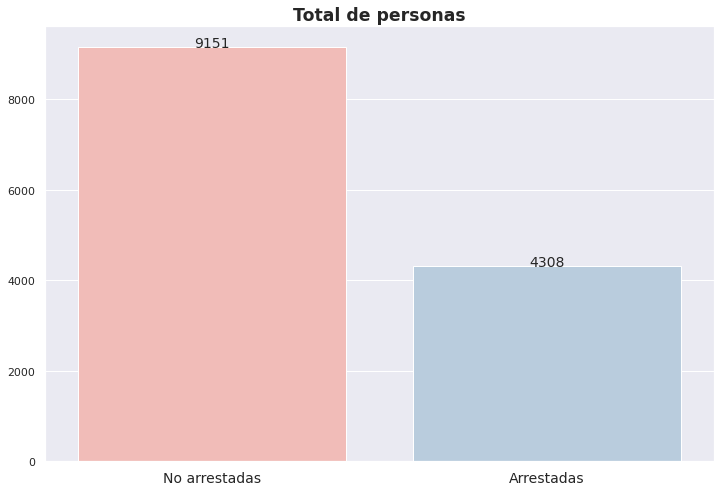

In [ ]:
plt.figure(figsize=(12,8))
sns.set_theme(style='darkgrid')
g = sns.countplot(x='suspect_arrested_flag', data=df, palette='Pastel1')
#g.set_yticks([t*50 for t in range(0,13)])
g.set_xticklabels(['No arrestadas','Arrestadas'], size=14)
g.set_title('Total de personas', fontsize='x-large', fontweight='bold')
g.set_xlabel('') 
g.set_ylabel('')
 
for p in g.patches:
        g.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, \
                    p.get_height()+0.1), ha='center', size=14)

In [ ]:
percent=df['suspect_arrested_flag'].sum()/len(df) * 100
print(f'Probabilidad de arresto: {percent:.1f}%')

Probabilidad de arresto: 32.0%


Se observa que la mayoria de las personas que fueron detenidas, no fueron arrestadas, con una probabilidad de ser arrestado/a del 32%.

<Figure size 1008x576 with 0 Axes>

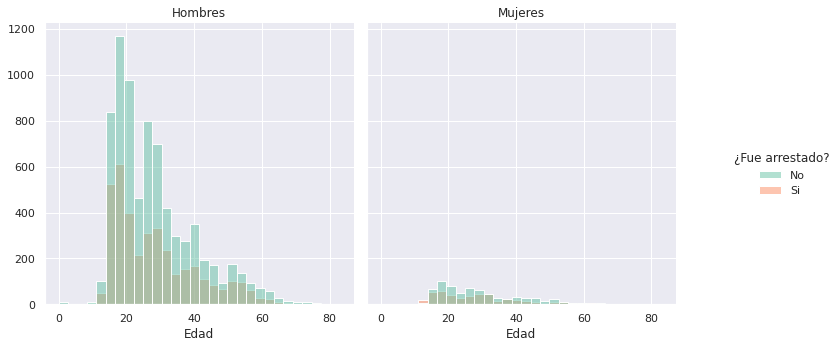

In [ ]:
plt.figure(figsize=(14,8))
g = sns.displot(df, x='suspect_reported_age', col='suspect_sex', hue='suspect_arrested_flag', bins=30, palette='Set2')
g.set_axis_labels('Edad','')
axes = g.axes.flatten()
axes[0].set_title('Hombres')
axes[1].set_title('Mujeres')
g.legend.set_title('¿Fue arrestado?')

new_labels = ['No', 'Si']
for t, l in zip(g.legend.texts, new_labels): t.set_text(l)

Para responder la pregunta: ¿Cuáles fueron los rangos de edades donde más personas sobrevivieron?

En el caso de los hombres el rango de edad con mayor probababilidad de arresto es de 17 a 23 años.

De las mujeres, a pesar de que muy pocas mujeres fueron detenidas y arrestadas, sobresale de 17 a 22 años.


####Suspect Race Description

Esta variable tiene que ver principalmente con la descripción de la etnicidad del sospechoso/detenido. Una de las teorías con mayor fuerza es que los arrestos y cateos policiacos se hacen de acuerdo a la raza y procedencia étnica de los individuos. Dicha situación es deplorable, ya que además de ser racista, niega todo tipo de equidad e imparcialidad ante la ley y su aplicación. 

In [ ]:
df["suspect_race_description"].unique()

array(['BLACK', 'WHITE', 'BLACK HISPANIC', 'WHITE HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN N', nan],
      dtype=object)

In [ ]:
df["suspect_race_description"].nunique()

6

Después de los códigos anteriores, se puede observar que existen 6 categorías generales en las que los sospechosos son clasificados. Ahora, para conocer la frecuencia e incidencia de cada categoría, se procede a constuir un gráfico de barras

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


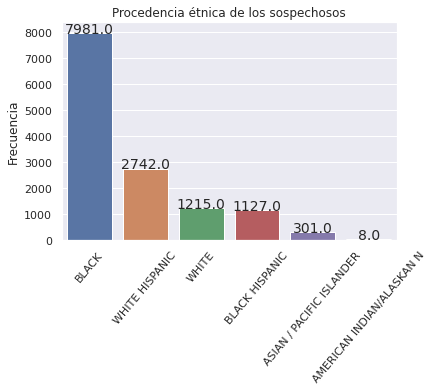

In [ ]:
suspect_race_counts = df['suspect_race_description'].value_counts()
ax = sns.barplot(suspect_race_counts.index, suspect_race_counts)
ax.set_title('Procedencia étnica de los sospechosos')
ax.set(ylabel='Frecuencia');
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, \
                    p.get_height()+0.1), ha='center', size=14)

Como se puede observar en la figura anterior, más del 50% de los sospechosos son de procedencia afroamericana, lo cual nuevamente trae a la luz la situación de detenimientos con base en las características raciales de los inidivuos.

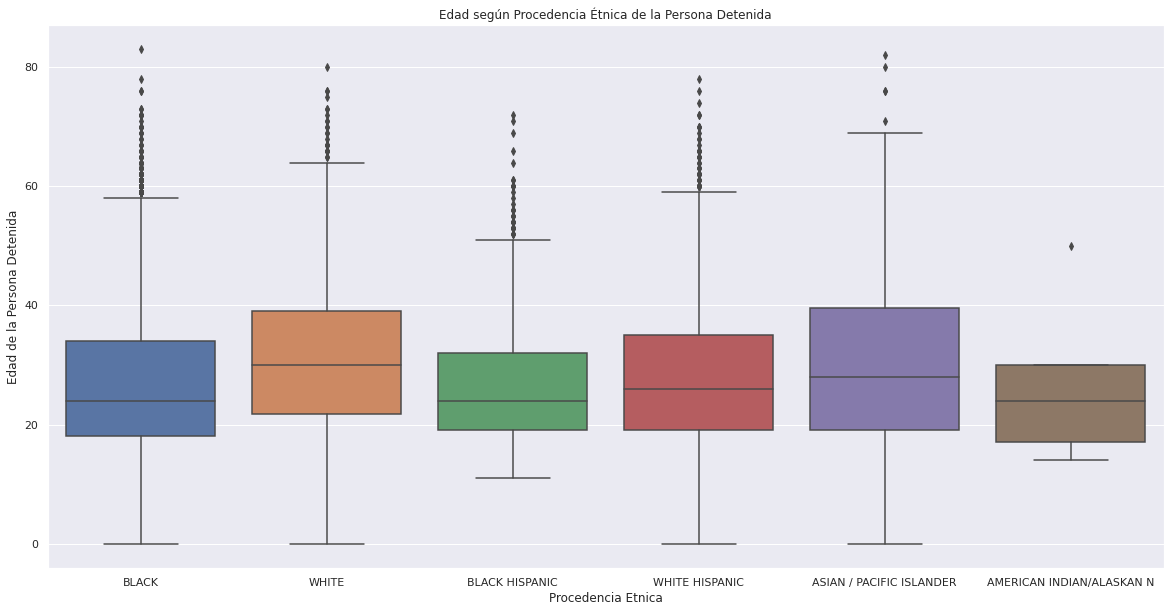

In [ ]:
plt.figure(figsize=(20, 10))
ax2 = sns.boxplot(data=df, x='suspect_race_description', y='suspect_reported_age');
ax2.set_title('Edad según Procedencia Étnica de la Persona Detenida')
ax2.set(ylabel='Edad de la Persona Detenida', xlabel='Procedencia Etnica');

In [ ]:
pd.crosstab(df['suspect_arrested_flag'],df['suspect_race_description'])

suspect_race_description,AMERICAN INDIAN/ALASKAN N,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
suspect_arrested_flag,,,,,,
0,5,221,5482,752,798,1832
1,3,80,2499,375,417,910


####Stop Location Boro Name

Con el fin de plantear un antecedente y dar algo de contexto, la ciudad de Nueva York se compone de 5 divisiones municipales administrativas conocidas como Borough (Boro). Las 5 divisiones son:
*   El Bronx
*   Brooklyn
*   Manhattan
*   Queens
*   Staten Island

Dicha información se confirma a continuación al momento de correr el comando "unique"

In [ ]:
df["stop_location_boro_name"].unique()

array(['MANHATTAN', 'BRONX', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


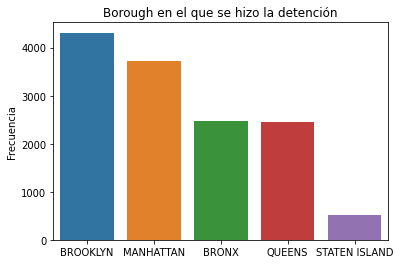

In [ ]:
stop_boro_count = df['stop_location_boro_name'].value_counts()
ax = sns.barplot(stop_boro_count.index, stop_boro_count)
ax.set_title('Borough en el que se hizo la detención')
ax.set(ylabel='Frecuencia');

Sin duda, esta información es de gran utilidad, ya que se conoce entonces que la mayoría de las detenciones se hacer en la municipialidad de Brooklyn. Sin embargo, es imperativo no perder el enfoque de la investigación, las personas. Por esta razón, no solo basta con conocer el borough en el que se hizo la detención, sino comenzar a combinar los campos para obtener información relevante. 

In [ ]:
df_grouped = df.groupby('suspect_sex')[['height', 'weight', 'sport']].max()

### Correlaciones y Regresión Lineal Simple
---


Se tiene la siguiente matriz de coeficientes de correlación de Pearson:

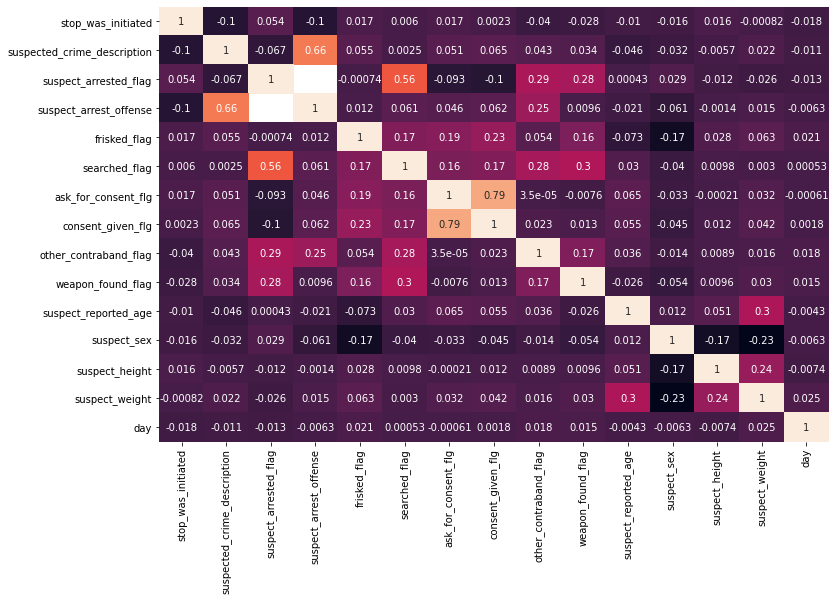

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(method='pearson'), annot=True, cbar=False)

La correlación es una medida que toma valores entre -1 y 1 que indica la relación lineal entre 2 variables. Entre más cercana al 0, menor es la relación entre las variables, es por ello que la diagonal es de unos, ya que 1 variable es totalmente dependiente de si misma. Entre mayor sea la correlación negativa, más obscuro sera el color del recuadro y entre mayor sea la correlación positiva, más claro sera el color del recuadro.

Por ahora nos interesa la correlación entre la variable suspect_arrested_flag y las demás variables, se observa que las variables searched_flag, other_contraband_flag y weapon_found_flag son las únicas que tienen una correlación significativa. En el caso de searched_flag se tiene que la correlación es de 0.56, esto indica una relación directamente proporcional con la variable suspect_arrested_flag, es decir cuando suspect_arrested_flag aumenta (0 a 1) searched_flag también aumenta, esto se puede interpretar como que la gente a la que revisan es la que tiene mayor probabilidad de ser arrestada. La variable other_contraband_flag tiene una correlación de 0.29 y weapon_found_flag de 0.28, lo cual tiene sentido ya que ambos se catalogan como delitos.

Así se pudiera responder parcialmente la pregunta de ¿Qué variable tuvo mayor influencia en el arresto de la persona?

Según la matriz de correlaciones que la persona haya sidor evisada fue la variable con mayor influencia en la determinación de si la persona es arrestada o no. Es importante mencionar que la correlación de Pearson sólo puede utilizarse cuando las variables son cuantitativas, es por ello que varias variables no figuran en la matriz, por lo que aún no se pueden descartar otras variables como la respuesta a la pregunta.
